**Predict Future Stock Price**

In [3]:
#Import Libraries
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


**Load Stock Data**


In [9]:
# Select stock
ticker = 'AAPL'


In [10]:
# Download historical data
data = yf.download(ticker, start="2023-01-01", end="2024-01-01")

C:\Users\rmssh\AppData\Local\Temp\ipykernel_11196\2247709788.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start="2023-01-01", end="2024-01-01")
[*********************100%***********************]  1 of 1 completed


In [11]:
# Display first few rows
print(data.head())

Price            Close        High         Low        Open     Volume
Ticker            AAPL        AAPL        AAPL        AAPL       AAPL
Date                                                                 
2023-01-03  123.470604  129.226044  122.582112  128.613978  112117500
2023-01-04  124.744125  127.014716  123.480495  125.267347   89113600
2023-01-05  123.421257  126.136090  123.164587  125.504275   80962700
2023-01-06  127.962418  128.623848  123.292909  124.398589   87754700
2023-01-09  128.485641  131.703962  128.228972  128.801557   70790800


**Prepared a Dataset**

In [12]:
# Shift 'Close' column to get next day's close price
data['Next_Close'] = data['Close'].shift(-1)

In [ ]:
# Drop the last row as it doesn't have the next day's close price
data.dropna(inplace=True)

In [14]:
# Select features and target
X = data[['Open', 'High', 'Low', 'Volume']]
y = data['Next_Close']

In [15]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

**Train a Linear Regression Model**

In [17]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [18]:
# Predict
y_pred = model.predict(X_test)

In [19]:
# Metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [20]:
print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")

Mean Squared Error: 5.154298812615119
R2 Score: 0.9364692886494925


**Plot Actual vs Predicted**

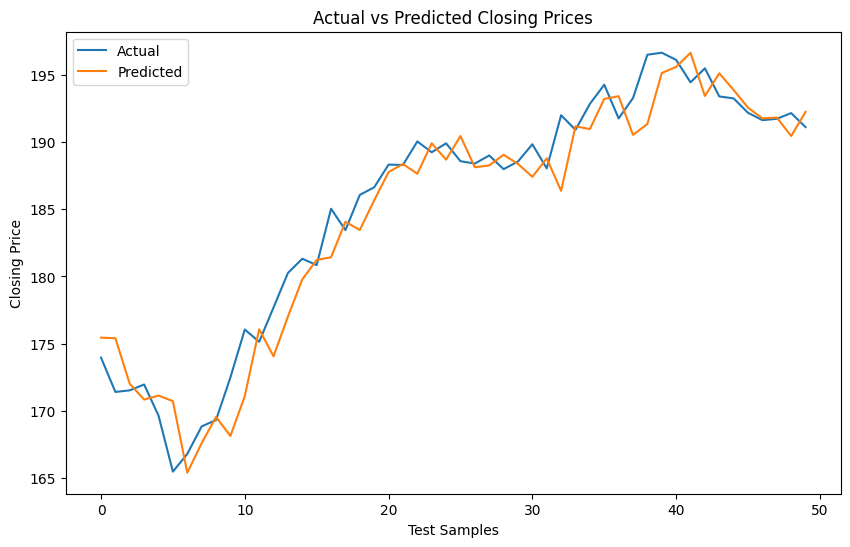

In [ ]:
#Line Plot
plt.figure(figsize=(10,6))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title('Actual vs Predicted Closing Prices')
plt.xlabel('Test Samples')
plt.ylabel('Closing Price')
plt.legend()
plt.show()


**Train a RandomForestRegressor Model**

In [ ]:
#Import RandomForestRegressor Model
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
#Predict
y_pred_rf = rf_model.predict(X_test)

In [ ]:
#Metrics
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)


In [27]:
print(f"Mean Squared Error: {mse_rf}")
print(f"R2 Score: {r2_rf}")

Mean Squared Error: 5.994320007489552
R2 Score: 0.926115379029573


**Plot Actual vs Predicted**

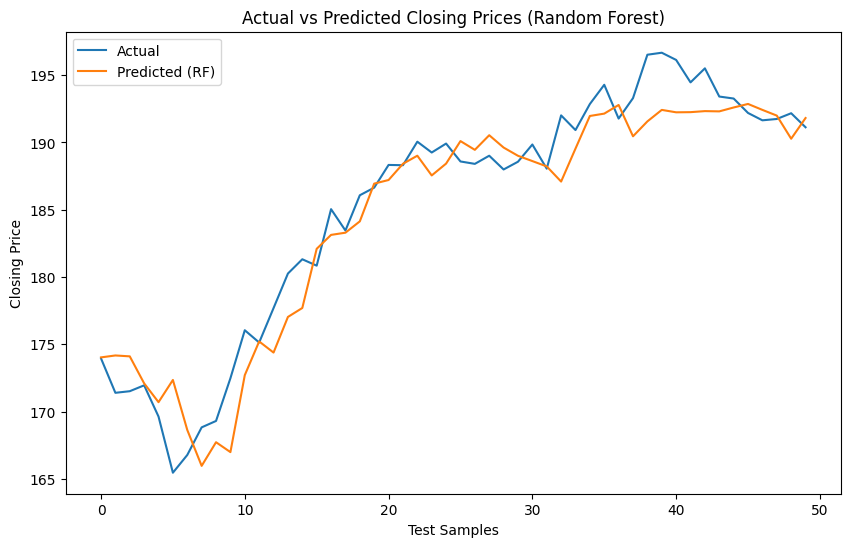

In [28]:
#Line Plot
plt.figure(figsize=(10,6))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred_rf, label='Predicted (RF)')
plt.title('Actual vs Predicted Closing Prices (Random Forest)')
plt.xlabel('Test Samples')
plt.ylabel('Closing Price')
plt.legend()
plt.show()